In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
list_data = []

for n in range(1, 150):
  list_data.append(json.load(open("../data/nat_extract/atividades ({}).json".format(n),"rb")))

In [5]:
my_range = range(0,149)

In [6]:
raw = pd.DataFrame()

for x in my_range:
  teste = list_data[x]
  teste = pd.json_normalize(teste)
  teste['id_corrida'] = x
  raw = pd.concat([raw,teste]).reset_index(drop=True)

In [7]:
raw.head(2)

,id,type,app_id,start_epoch_ms,end_epoch_ms,last_modified,active_duration_ms,session,delete_indicator,summaries,sources,change_tokens,metric_types,metrics,moments,tags.com.nike.name,tags.com.nike.running.goaltype,tags.com.nike.running.ios.photos,tags.com.nike.running.originalactivityid,tags.com.nike.running.recordingappversion,tags.com.nike.running.recordingsource,tags.com.nike.running.syncappversion,tags.com.nike.running.syncsource,tags.com.nike.temperature,tags.com.nike.weather,tags.com.nike.weathersource,tags.location,id_corrida,tags.com.nike.running.databaseformat,tags.com.nike.running.fullpowerenabled
0,0a611c05-cfad-44e5-bb07-e7c53dc61534,run,com.nike.sport.running.ios,1680775468014,1680777275965,1680779398427,1803188,False,False,"[{'metric': 'distance', 'summary': 'total', 's...","[com.nike.running.ios.calculatedcalories, com....",[a24fcd6ca956e751162ae236d7e08a621be74a66bdd35...,"[elevation, distance, latitude, pace, calories...","[{'type': 'distance', 'unit': 'KM', 'source': ...","[{'key': 'split_km', 'value': '1', 'timestamp'...",quinta-feira corrida matutina,freeRun,"[\n ""2DCC0486-3A8E-430F-B0F9-AF74C019FFD0\/L0...",06369F2E-3D61-4B14-A692-14A46037316B,7.21.0,phone,7.21.0,phone,23.49,partly-cloudy-day,appleWeatherKit,outdoors,0,NaN,NaN
1,0b1d84dc-cbe3-487b-b2c7-8c382873b601,run,com.nike.sport.running.ios,1676629486354,1676631448059,1676634126926,1829197,False,False,"[{'metric': 'distance', 'summary': 'total', 's...","[com.nike.running.ios.calculatedcalories, com....",[b467c625e6e3aa753d4640c33f1b47eaa65602bab6afe...,"[elevation, distance, latitude, pace, calories...","[{'type': 'distance', 'unit': 'KM', 'source': ...","[{'key': 'split_km', 'value': '1', 'timestamp'...",sexta-feira corrida matutina,freeRun,"[\n ""1FAA054A-2D7F-4DF6-9273-1DF34E8CBC9C\/L0...",6D152236-EBE0-4976-BF0E-ABB969C428A8,7.20.0,phone,7.20.0,phone,27.83,partly-cloudy-day,darkSky,outdoors,1,NaN,NaN


In [8]:
df = pd.DataFrame()

for i in range(0, len(raw)):

    prov = pd.json_normalize(raw.summaries[i])
    prov['metric_all'] = prov.metric+'_'+prov.summary

    final = prov[['metric_all', 'value']].T
    final = final.reset_index(drop=True)
    final.columns = final.iloc[0]
    final = final.tail(1).reset_index(drop=True)
    final['id_corrida'] = i

    df = pd.concat([df,final]).reset_index(drop=True)

In [9]:
df = df.merge(raw[["id_corrida","end_epoch_ms","tags.com.nike.weather"]], how="left", on="id_corrida")

df.rename(columns={'tags.com.nike.weather': 'clima'}, inplace=True)

df.head()

,distance_total,calories_total,ascent_total,nikefuel_mean,nikefuel_total,pace_mean,steps_total,speed_mean,descent_total,id_corrida,end_epoch_ms,clima
0,5.015618,277.002,9.369666,43.204182,1298.421043,5.991911,4957.0,10.013501,10.764811,0,1680777275965,partly-cloudy-day
1,5.001334,275.64,11.248337,42.735326,1302.855509,6.095697,4935.0,9.843009,11.832291,1,1676631448059,partly-cloudy-day
2,5.009622,274.759,16.099678,41.2941,1307.088349,6.318471,5073.0,9.495968,16.591148,2,1644230091731,partly-cloudy-day
3,5.003979,274.366,20.55724,42.002833,1320.482961,6.282591,5030.0,9.5502,25.926434,3,1669979454378,partly-cloudy-day
4,5.00888,277.355,28.468338,40.501254,1307.672748,6.445996,5369.0,9.308104,25.635773,4,1600945660789,partly-cloudy-day


In [10]:
df['dia'] = pd.to_datetime(df['end_epoch_ms'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo').dt.tz_localize(None)

df.sort_values('dia', ascending=True, inplace=True)

df.reset_index(inplace=True)

In [11]:
df.distance_total = round(df.distance_total.astype(float),2)
df.speed_mean = round(df.speed_mean.astype(float),2)
df.nikefuel_mean = round(df.nikefuel_mean.astype(float),2)
df.pace_mean = round(df.pace_mean.astype(float),2)
df.nikefuel_total = round(df.nikefuel_total.astype(float),2)
df.descent_total = round(df.descent_total.astype(float),2)
df.calories_total = round(df.calories_total.astype(float),2)
df.ascent_total = round(df.ascent_total.astype(float),2)

df.steps_total = df.steps_total.astype(float)

In [12]:
#transformando pace
df['pace_real'] = df.pace_mean.apply(int) + (round(((df.pace_mean - 
                                                     df.pace_mean.apply(int)) * 60),0) / 100)

df['pace_all_mean'] = round(df.pace_real.mean(),2)
df['distance_all_mean'] = round(df.distance_total.mean(),2)
df['dia_diff'] = df.dia.diff().dt.days

In [13]:
df.head()

,index,distance_total,calories_total,ascent_total,nikefuel_mean,nikefuel_total,pace_mean,steps_total,speed_mean,descent_total,id_corrida,end_epoch_ms,clima,dia,pace_real,pace_all_mean,distance_all_mean,dia_diff
0,121,8.06,437.22,10.57,37.41,2131.12,7.07,NaN,8.49,15.03,121,1592082160370,clear-day,2020-06-13 18:02:40.370,7.04,6.11,5.65,NaN
1,40,8.04,443.69,17.52,39.46,2122.51,6.69,NaN,8.96,21.15,40,1592306940567,partly-cloudy-day,2020-06-16 08:29:00.567,6.41,6.11,5.65,2.0
2,38,10.05,556.74,17.85,40.34,2639.40,6.51,NaN,9.21,19.25,38,1592682389975,clear-day,2020-06-20 16:46:29.975,6.31,6.11,5.65,4.0
3,104,5.03,280.16,3.07,41.47,1322.78,6.34,NaN,9.46,3.56,104,1593084105762,partly-cloudy-day,2020-06-25 08:21:45.762,6.20,6.11,5.65,4.0
4,32,7.03,391.74,15.05,41.69,1853.19,6.32,NaN,9.49,10.05,32,1593362350281,partly-cloudy-day,2020-06-28 13:39:10.281,6.19,6.11,5.65,3.0


In [14]:
print('Período:', (df.dia.max() - df.dia.min()).days, 'dias')
print('Total corridas:', len(df), 'corridas')
print('Km corridos:', df.distance_total.sum())
print('Pace médio (todas as corridas):', round(df.pace_real.mean(),2))
print('Distância média (todas as corridas):', round(df.distance_total.mean(),2))
print('Total calorias:', round(df.calories_total.sum(),2))

Período: 1199 dias
Total corridas: 149 corridas
Km corridos: 842.2599999999999
Pace médio (todas as corridas): 6.11
Distância média (todas as corridas): 5.65
Total calorias: 46510.26


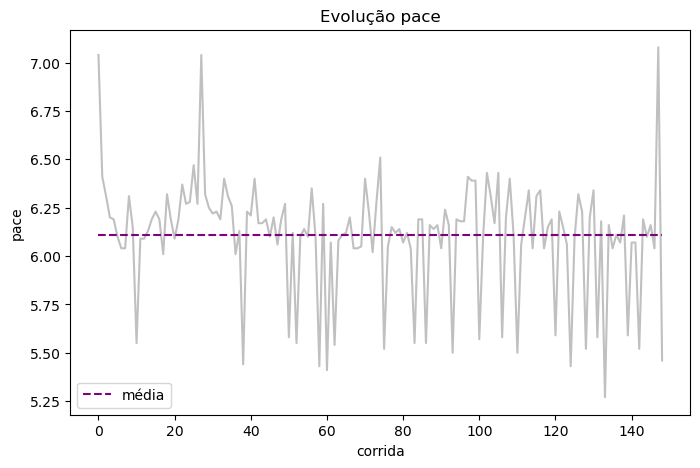

In [15]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.pace_real, color='silver')
plt.plot(df.pace_all_mean, color='purple', linestyle='dashed', label='média')
plt.title("Evolução pace")
plt.xlabel("corrida")
plt.ylabel("pace")
plt.legend()


plt.show()

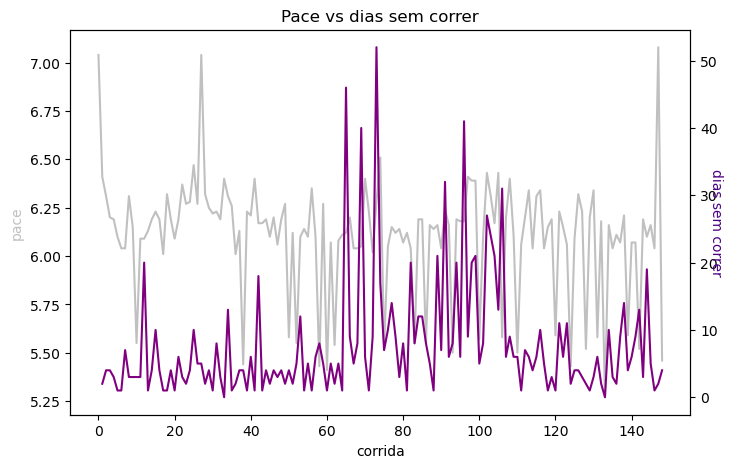

In [16]:
fig,ax = plt.subplots(figsize=(8, 5))
ax.plot(df.index, df.pace_real, color='silver')
ax.set_xlabel('corrida')
ax.set_ylabel('pace',color='silver')

ax2=ax.twinx()
ax2.plot(df.index, df.dia_diff,color='purple')
ax2.set_ylabel('dias sem correr',color='indigo', rotation=270)

plt.title('Pace vs dias sem correr')
plt.show()

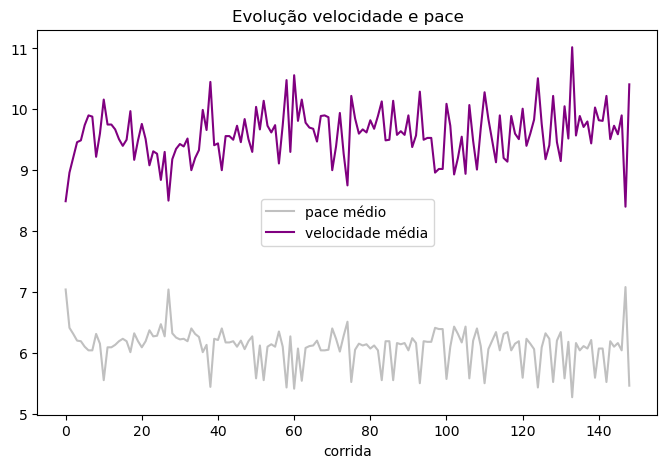

In [17]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.pace_real, color='silver', label='pace médio')
plt.plot(df.speed_mean, color='purple', label = 'velocidade média')
plt.title("Evolução velocidade e pace")
plt.xlabel("corrida")
plt.legend()


plt.show()

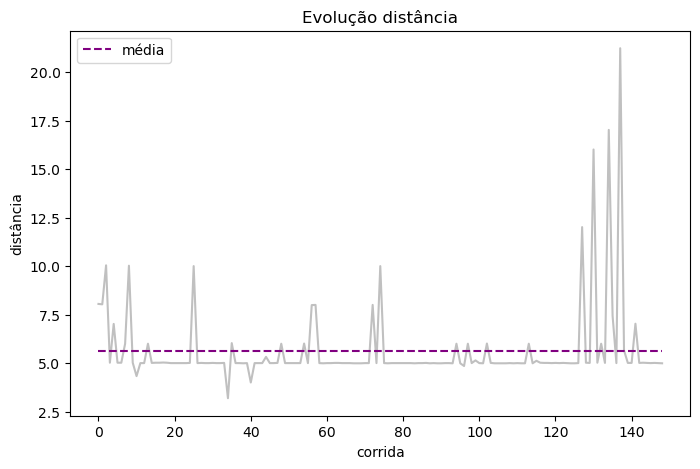

In [18]:
plt.subplots(figsize=(8, 5))

plt.plot(df.index, df.distance_total, color='silver')
plt.plot(df.distance_all_mean, color='purple', linestyle='dashed', label='média')
plt.title("Evolução distância")
plt.xlabel("corrida")
plt.ylabel("distância")
plt.legend()


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


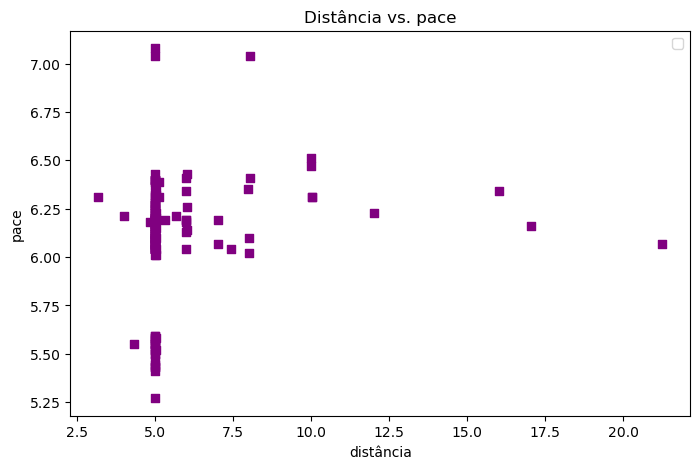

In [19]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.distance_total, df.pace_real, color='purple', marker='s')
plt.title("Distância vs. pace")
plt.xlabel("distância")
plt.ylabel("pace")
plt.legend()


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


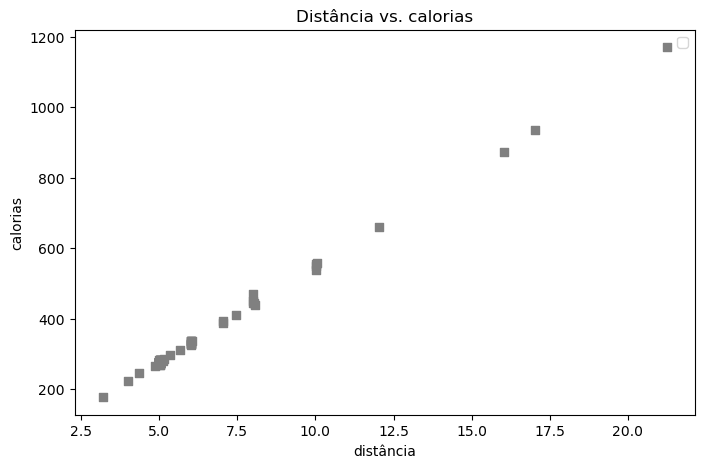

In [20]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.distance_total, df.calories_total, color='grey', marker='s')
plt.title("Distância vs. calorias")
plt.xlabel("distância")
plt.ylabel("calorias")
plt.legend()


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


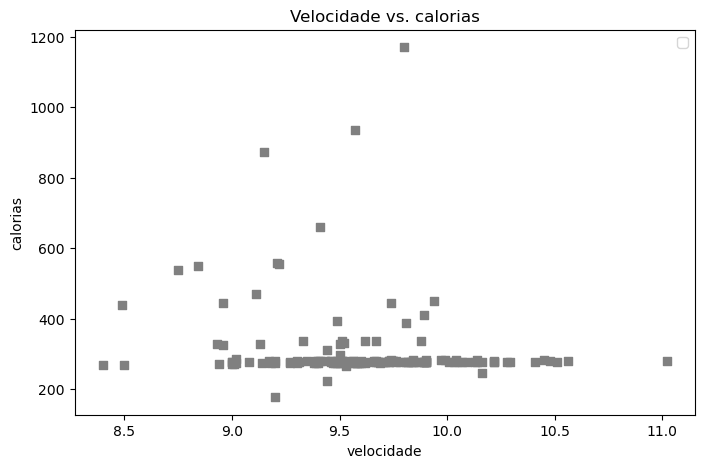

In [21]:
plt.subplots(figsize=(8, 5))

plt.scatter(df.speed_mean, df.calories_total, color='grey', marker='s')
plt.title("Velocidade vs. calorias")
plt.xlabel("velocidade")
plt.ylabel("calorias")
plt.legend()


plt.show()

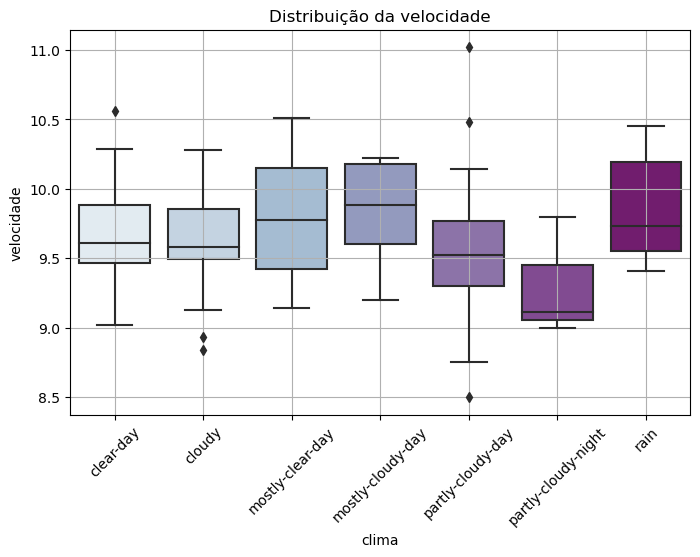

In [28]:
df_clean = df.dropna()

pivot_clima = df_clean[['speed_mean','clima']]
pivot_clima = pivot_clima.pivot(columns='clima', values='speed_mean')

fig = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=pivot_clima, orient="v", palette="BuPu")
plt.ylabel("velocidade")
plt.xticks(rotation=45)
plt.title("Distribuição da velocidade")
ax.grid()

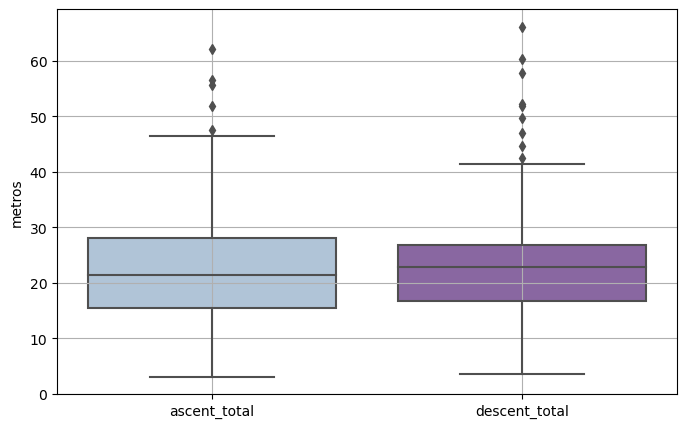

In [29]:
fig = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df[['ascent_total','descent_total']], orient="v", palette="BuPu")
plt.ylabel("metros")
ax.grid()